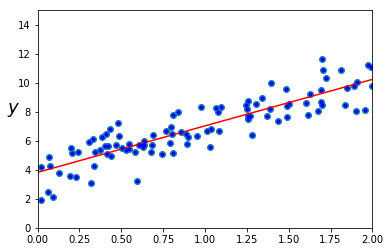

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X,y)
plt.axis([0, 2, 0, 15])
plt.ylabel("$y$", rotation=0, fontsize=18)       #$sign just making it itlaics

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.82542845],
       [10.23856199]])

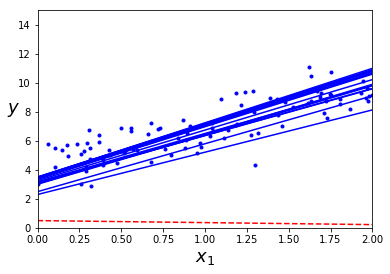

In [61]:
#understanding batch descent vs Stochastic gradient descend
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

    
#stochastic from scratch
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown                          # not shown
plt.show()  

#-----------builtin for stochastic
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

#-------mini batch descent


theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)



(array([1.97762392]), array([[1.03679428, 0.49545826]]))

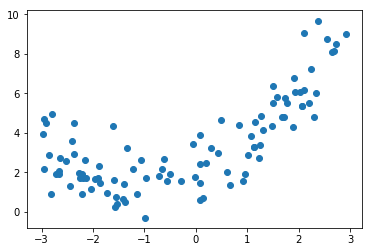

In [71]:
#generating quadratic tdata for polynomial regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

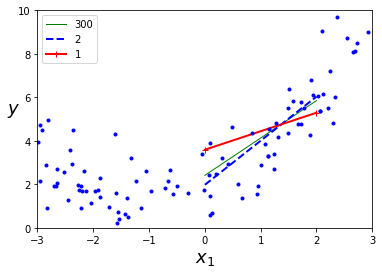

In [76]:
#for plotting the regressor curve of different models
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


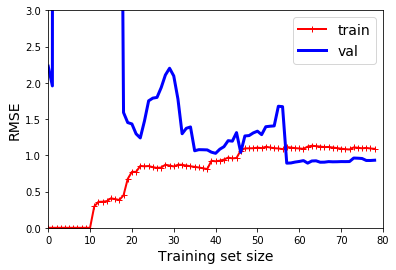

In [87]:
#plotting learing curves (first is underfitting because rmse is high and train/test is same)

# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# def plot_learning_curves(model, X, y):
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
#     train_errors, val_errors = [], []
#     for m in range(1, len(X_train)):
#         model.fit(X_train[:m], y_train[:m])
#         y_train_predict = model.predict(X_train[:m])
#         y_val_predict = model.predict(X_val)
#         train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
#         val_errors.append(mean_squared_error(y_val, y_val_predict))

#     plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
#     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
#     plt.legend(loc="upper right", fontsize=14)   # not shown in the book
#     plt.xlabel("Training set size", fontsize=14) # not shown
#     plt.ylabel("RMSE", fontsize=14)              # not shown

# lin_reg = LinearRegression()
# plot_learning_curves(lin_reg, X, y)
# plt.axis([0, 80, 0, 3])                         # not shown in the book
# plt.show()  


#overfitting 
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown

plt.show()  

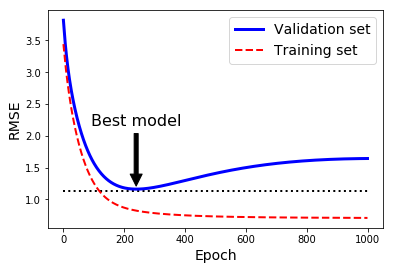

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=True)

In [99]:
#regularizations

# from sklearn.linear_model import Ridge
# ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
# ridge_reg.fit(X, y)
# ridge_reg.predict([[1.5]])

# d_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
# sgd_reg.fit(X, y.ravel())
# sgd_reg.predict([[1.5]])

# #lasso

# from sklearn.linear_model import Lasso
# lasso_reg = Lasso(alpha=0.1)
# lasso_reg.fit(X, y)
# lasso_reg.predict([[1.5]])


# d_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l1", random_state=42)
# sgd_reg.fit(X, y.ravel())
# sgd_reg.predict([[1.5]])
 
# #Elastic net
# from sklearn.linear_model import ElasticNet
# elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
# elastic_net.fit(X,y)
# elastic_net.predict([[1.5]])

#Early stopping
from sklearn.base import clone
np.random.seed(42)


m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, penalty=None,  eta0=0.0005, warm_start=True,learning_rate="constant",
                       random_state=42)


minimum_val_error = float("inf")
best_epoch = None
best_model = None

n_epochs = 1000
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

#best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

best_model

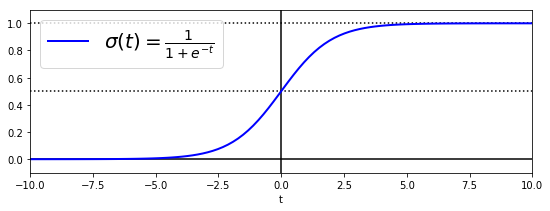

In [107]:
#plotting sigmoid

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()



In [108]:
#playing with iris dataset

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())



['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

array([1, 0])

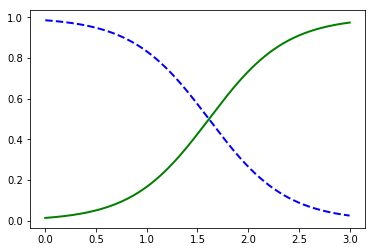

In [136]:
X =  iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear",random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

#to see where the line is for the two classes
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

log_reg.predict([[1.7], [1.5]])



In [140]:
#softmax regression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

softmax_reg.predict_proba([[5,2]])


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [273]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

ep = 1e-10
m = y.shape[0]
X_train = np.c_[np.ones((m, 1)), X]  # add 1 to each instance at the beginning

n_classes = len(np.unique(y))
n_feats = X_train.shape[1]

thetas = np.random.rand(n_feats ,n_classes)

sm_score = np.dot(X_train, thetas)
sm_score.shape


def hotcoding_labels(labels):
    nar = np.zeros((m, n_classes))
    nar[np.arange(m), labels] = 1
    return nar

def sfmax_func(array_of_scores):
    array_exp = np.exp(array_of_scores)                         #shape 150, 3
    ar_row_sum = np.sum(array_exp, axis = 1, keepdims = True)   #shape = 150, 1
    pk = array_exp / ar_row_sum
    return pk
    
pk = sfmax_func(sm_score)

#we need to change the target label in a way that is understood by the loss equation
labels_encoded = hotcoding_labels(y)

Jtheta = -np.mean(np.sum(labels_encoded * np.log(pk + ep), axis=1))     
#more confusing way to do this
# A = (np.dot(np.log(pk + ep), labels_encoded.T)).diagonal()
# A = -np.mean(A)

#deltheta = np.dot(X_train, (pk - labels_encoded).T)
#deltheta.shape
error = pk - labels_encoded
newar = []
for i in range(n_classes):
    er = error[:, i].reshape(-1, 1)
    toappend = np.mean((X_train * er), axis = 0)
    newar.append(toappend)
gradients = np.array(newar).T
#gradeints = gradients.T   #becuase my way resulted in classes in rows as in 1st row first class theta second row second class theta and so on. taking transpose makes it how it is 


array([[ 0.43941703, -0.2231476 , -0.21626943],
       [ 2.72316969, -1.11781758, -1.6053521 ],
       [ 0.97286973, -0.35644482, -0.61642491]])

In [253]:
a = np.array([[1,3], [2,3]])
b = np.array([[1], [2]])
print(a)
print(b)
x = a*b
print(x)
np.mean(x)

[[1 3]
 [2 3]]
[[1]
 [2]]
[[1 3]
 [4 6]]


3.5

In [274]:
gradients = 1/m * X_train.T.dot(pk - labels_encoded)
gradients

array([[ 0.43941703, -0.2231476 , -0.21626943],
       [ 2.72316969, -1.11781758, -1.6053521 ],
       [ 0.97286973, -0.35644482, -0.61642491]])

In [223]:
nar = np.zeros((m, n_classes))
nar[np.arange(m), y] = 1
nar

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

1e-10